In [1]:
# from torchsr.datasets import Div2K
# from torchsr.models import ninasr_b0
from utils.training_utils import BabySINE, ImageDataset, pixel_coordinates_normalized, plot_image, list_png_files, load_image
from torch.utils.data import DataLoader
import numpy as np
import torch
import os
import matplotlib.pyplot as plt

# Autoreload
%reload_ext autoreload
%autoreload 2

# Div2K dataset
# dataset = Div2K(root="./data", scale=2, download=False)

In [2]:
# List all PNG files in the data folder
data_folder = "data"
image_files = list_png_files(data_folder)
print(f"Available PNG files: {image_files}")

Available PNG files: ['0010.png', '0028.png', '0002.png']


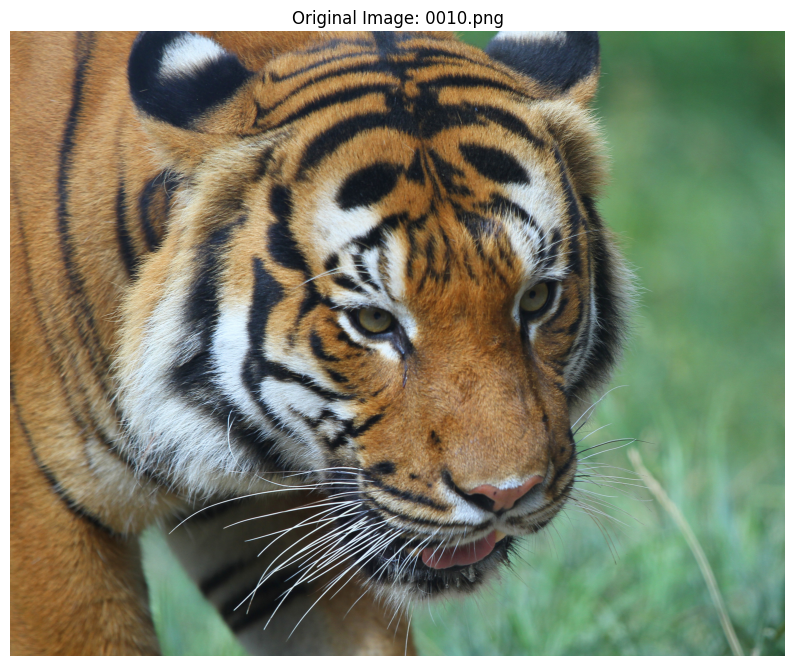

Image dimensions: 1644x2040, 3 channels


In [3]:
img_file_path = image_files[0]
img_np_original, height_target, width_target, channels = load_image(data_folder, img_file_path)

In [4]:
# Downsample the image and generate coordinates and pixel values
downsize_factor = 5
low_res_coords, pixel_values, norm_image, x, y, high_res_coords = pixel_coordinates_normalized(
    img_np_original, downsize_factor
)

The original image has shape: (1644, 2040, 3)


In [5]:
# Create dataset and dataloader
dataset = ImageDataset(low_res_coords, pixel_values)
dataloader = DataLoader(dataset, batch_size=4096, shuffle=True)

In [6]:
# Initialize the model
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
model = BabySINE(sigma=10.0, omega_0=15).to(device)

In [7]:
# Train the model
losses = model.train_model(
    dataloader,
    num_epochs=300,
    lr=1e-4,
    sigma=10.0,
)

Using device: mps


  0%|          | 1/300 [00:00<04:41,  1.06it/s]

Epoch 0, Loss: 1.232290


  4%|▎         | 11/300 [00:05<02:16,  2.12it/s]

Epoch 10, Loss: 0.617953


  7%|▋         | 21/300 [00:10<02:10,  2.13it/s]

Epoch 20, Loss: 0.597533


 10%|█         | 31/300 [00:15<02:03,  2.17it/s]

Epoch 30, Loss: 0.590552


 14%|█▎        | 41/300 [00:19<01:58,  2.19it/s]

Epoch 40, Loss: 0.585677


 17%|█▋        | 51/300 [00:24<01:59,  2.08it/s]

Epoch 50, Loss: 0.581677


 20%|██        | 61/300 [00:29<01:54,  2.08it/s]

Epoch 60, Loss: 0.579332


 24%|██▎       | 71/300 [00:33<01:50,  2.08it/s]

Epoch 70, Loss: 0.577440


 27%|██▋       | 81/300 [00:38<01:44,  2.10it/s]

Epoch 80, Loss: 0.575801


 30%|███       | 91/300 [00:43<01:34,  2.22it/s]

Epoch 90, Loss: 0.573657


 34%|███▎      | 101/300 [00:47<01:31,  2.18it/s]

Epoch 100, Loss: 0.571576


 37%|███▋      | 111/300 [00:52<01:30,  2.09it/s]

Epoch 110, Loss: 0.570102


 40%|████      | 121/300 [00:57<01:21,  2.20it/s]

Epoch 120, Loss: 0.568778


 44%|████▎     | 131/300 [01:01<01:17,  2.17it/s]

Epoch 130, Loss: 0.567899


 47%|████▋     | 141/300 [01:06<01:13,  2.17it/s]

Epoch 140, Loss: 0.565679


 50%|█████     | 151/300 [01:11<01:07,  2.19it/s]

Epoch 150, Loss: 0.564597


 54%|█████▎    | 161/300 [01:15<01:06,  2.10it/s]

Epoch 160, Loss: 0.564298


 57%|█████▋    | 171/300 [01:20<00:59,  2.15it/s]

Epoch 170, Loss: 0.562638


 60%|██████    | 181/300 [01:25<00:56,  2.10it/s]

Epoch 180, Loss: 0.561223


 64%|██████▎   | 191/300 [01:29<00:50,  2.14it/s]

Epoch 190, Loss: 0.561196


 67%|██████▋   | 201/300 [01:34<00:46,  2.13it/s]

Epoch 200, Loss: 0.561944


 70%|███████   | 211/300 [01:39<00:42,  2.10it/s]

Epoch 210, Loss: 0.560300


 74%|███████▎  | 221/300 [01:43<00:37,  2.12it/s]

Epoch 220, Loss: 0.559322


 77%|███████▋  | 231/300 [01:48<00:33,  2.06it/s]

Epoch 230, Loss: 0.557788


 80%|████████  | 241/300 [01:53<00:28,  2.10it/s]

Epoch 240, Loss: 0.558841


 84%|████████▎ | 251/300 [01:58<00:22,  2.16it/s]

Epoch 250, Loss: 0.561746


 87%|████████▋ | 261/300 [02:03<00:18,  2.08it/s]

Epoch 260, Loss: 0.556290


 90%|█████████ | 271/300 [02:07<00:13,  2.07it/s]

Epoch 270, Loss: 0.556211


 94%|█████████▎| 281/300 [02:12<00:08,  2.12it/s]

Epoch 280, Loss: 0.557474


 97%|█████████▋| 291/300 [02:17<00:04,  2.10it/s]

Epoch 290, Loss: 0.561164


100%|██████████| 300/300 [02:21<00:00,  2.12it/s]


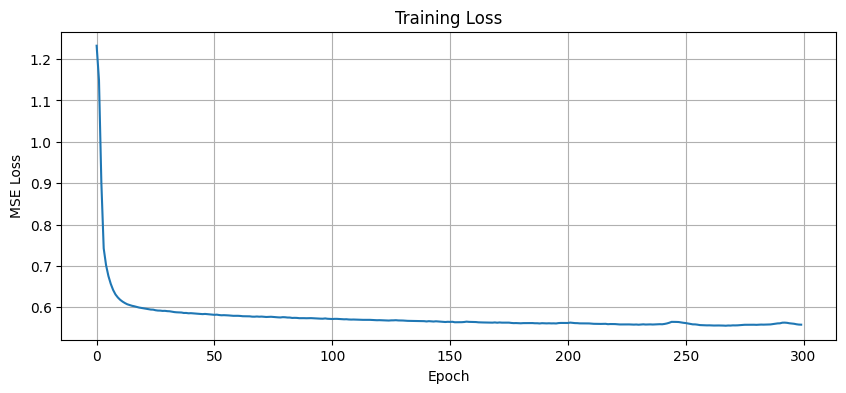

In [8]:
# Plot the loss curve
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

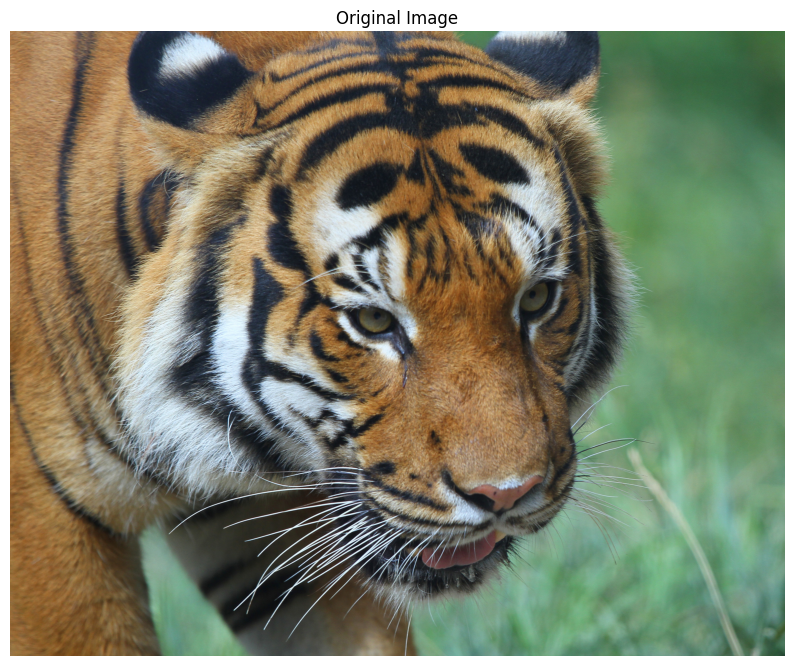

Image shape: (1644, 2040, 3)


In [13]:
# Plot the original Image
plt.figure(figsize=(10, 10))
plt.imshow(img_np_original)
plt.title("Original Image")
plt.axis("off")
plt.show()
print(f"Image shape: {img_np_original.shape}")

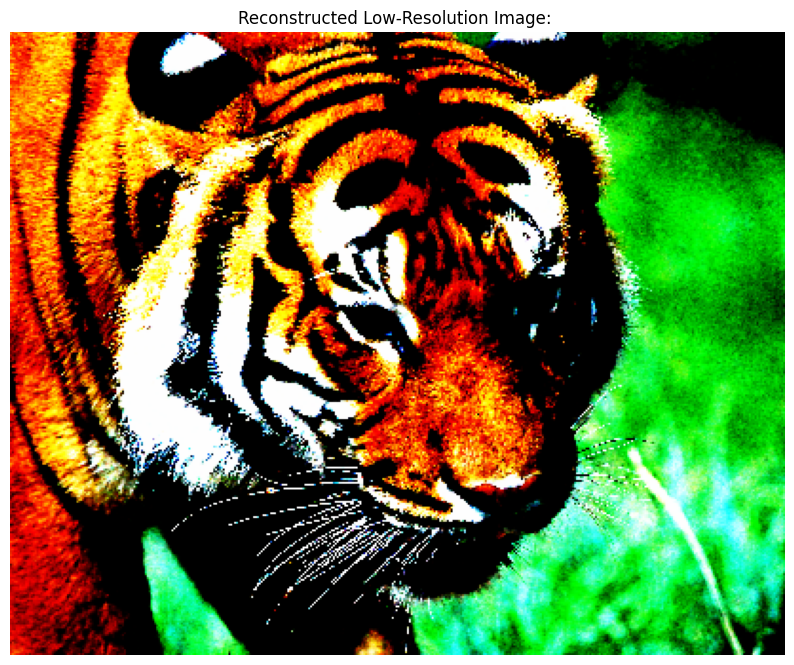

Image dimensions: 328x408, 3 channels


In [9]:
# Reconstruct the low-resolution image (learned during training)
target_coords_tensor_lr = torch.from_numpy(low_res_coords).float().to(device)
with torch.no_grad():
    pred_pixels_lr = model(target_coords_tensor_lr).cpu().numpy()

# Reshape and denormalize the predicted pixels for the low-resolution image
reconstructed_img_lr_normalized = pred_pixels_lr.reshape(x, y, 3)
reconstructed_img_lr_denormalized = (reconstructed_img_lr_normalized * 255).astype(np.uint8)
reconstructed_img_lr_denormalized = np.clip(reconstructed_img_lr_denormalized, 0, 255)

# Plot the reconstructed low-resolution image
plot_image(reconstructed_img_lr_denormalized, "Reconstructed Low-Resolution")

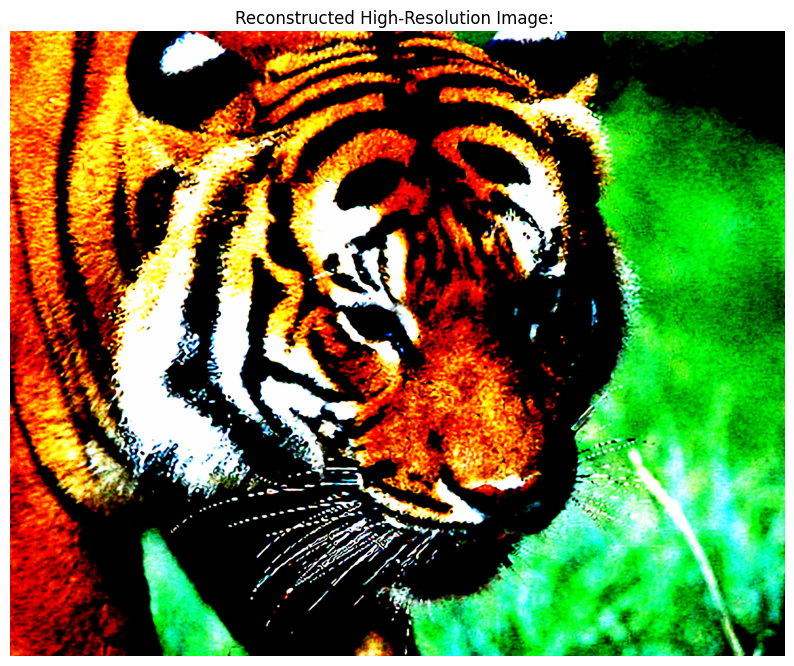

Image dimensions: 1644x2040, 3 channels


In [10]:
# Reconstruct the high-resolution image (using high-resolution coordinates)
target_coords_tensor_hr = torch.from_numpy(high_res_coords).float().to(device)
with torch.no_grad():
    pred_pixels_hr = model(target_coords_tensor_hr).cpu().numpy()

# Reshape and denormalize the predicted pixels for the high-resolution image
reconstructed_img_hr_normalized = pred_pixels_hr.reshape(img_np_original.shape[0], img_np_original.shape[1], 3)
reconstructed_img_hr_denormalized = (reconstructed_img_hr_normalized * 255).astype(np.uint8)
reconstructed_img_hr_denormalized = np.clip(reconstructed_img_hr_denormalized, 0, 255)

# Plot the reconstructed high-resolution image
plot_image(reconstructed_img_hr_denormalized, "Reconstructed High-Resolution")